<a href="https://colab.research.google.com/github/JhandryChimbo/data_mining/blob/main/Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Calculo de entropia
from scipy.stats import entropy

In [17]:
entropia_s=entropy([9/14, 5/14], base=2)
print(entropia_s)

0.940285958670631


In [18]:
ganancia_viento = entropia_s - (8/14)*entropy([6/8,2/8], base=2) - (6/14)*entropy([3/6,3/6], base =2)
print(ganancia_viento)

0.04812703040826943


In [19]:
# Implementacion python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
df_flores = sns.load_dataset('iris')
df_flores.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df_flores['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
df_flores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
# Datos X: sepal_length sepal_width petal_length petal_width
# Variable objetivo: species
X = df_flores.drop('species', axis=1)
y = df_flores['species']

In [24]:
# Separacion de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Modelo
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
# Entrenamiento
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
# Predicciones
y_pred = model_tree.predict(X_test)
print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [28]:
# Evaluacion
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



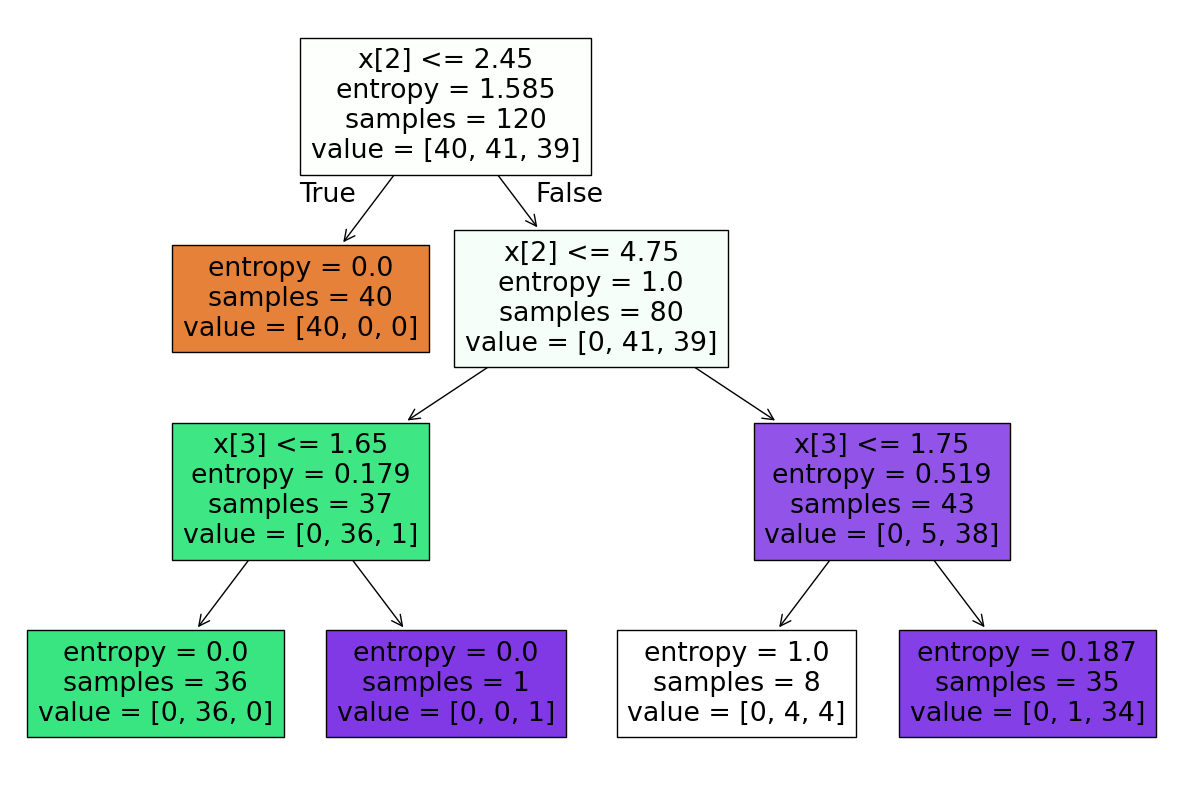

In [29]:
# Visualizacion
plt.figure(figsize=(15,10))
from sklearn import tree
tree.plot_tree(model_tree, filled=True)
plt.show()

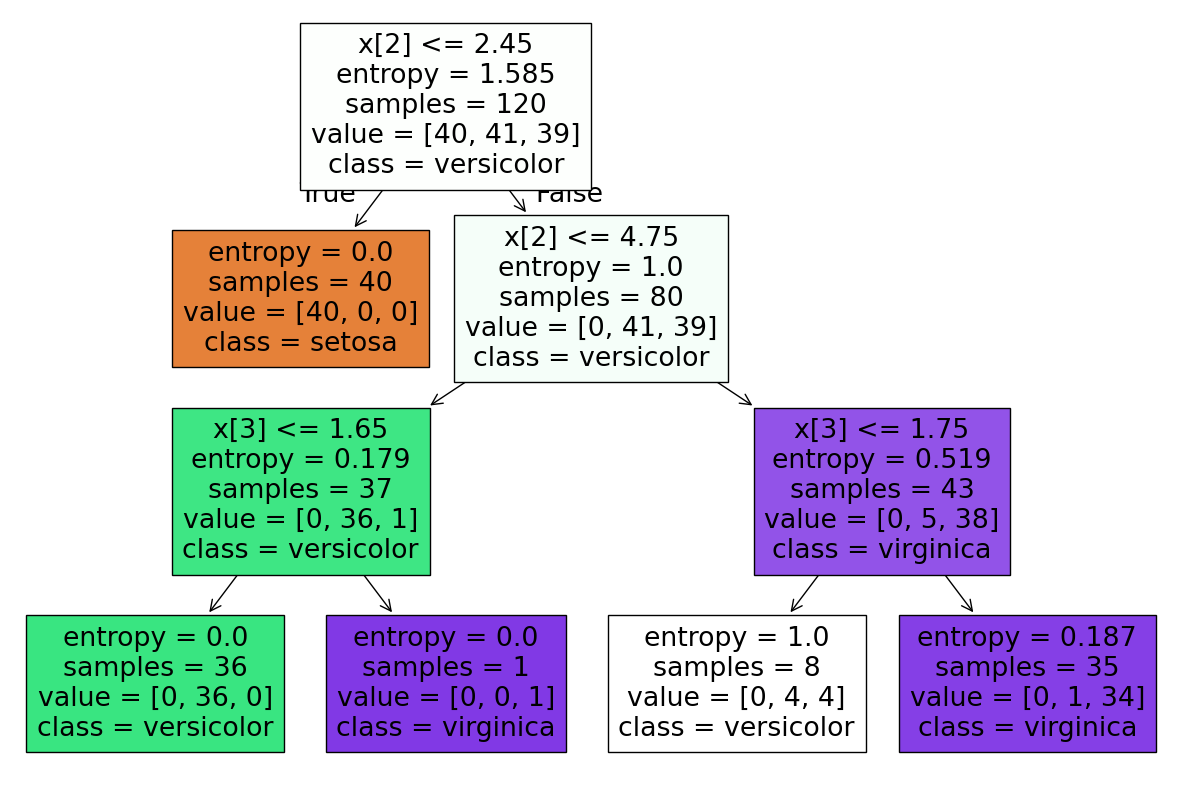

In [30]:
# Visualizacion de clases
plt.figure(figsize=(15,10))
tree.plot_tree(model_tree, filled=True, class_names=['setosa', 'versicolor', 'virginica'])
plt.show()

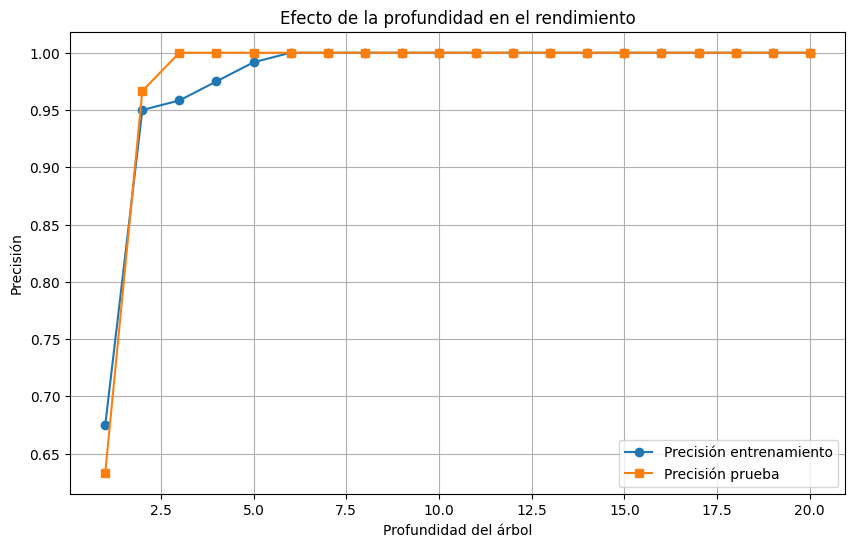

In [31]:
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Precisión entrenamiento')
plt.plot(depths, test_scores, marker='s', label='Precisión prueba')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Precisión')
plt.title('Efecto de la profundidad en el rendimiento')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(2, 15),
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Precisión en test con mejor modelo:", grid_search.best_estimator_.score(X_test, y_test))


Mejores parámetros: {'criterion': 'gini', 'max_depth': 4}
Precisión en test con mejor modelo: 1.0
